## IMDB 5000 movies dataset   -  "What are the common points of top commercial success movies?"

#### Structure 
1. Exploring dataset:  get a few first observation. 

2. "Commercial success metric"

3. Processing data: Cleaning data + Slicing data. 

4. Observation: top_100_highest_ROI_movies

5. A step further: observe the top_100_lowest_ROI_movies.

6. Conclusion

## 1. EXPLORING DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.shape

(5043, 28)

In [4]:
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [5]:
data.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [6]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### Note:
- Plot_keywords — words or phrases that describe motifs, themes, character types, or plot details. Each plot keyword is searchable, so if you wanted a list of, say, every movie where a character gets hit with a hammer, you just need to go to the “Hit With A Hammer” IMDb keyword page.
- Aspect_ratio: tỉ lệ màn hình (ex: 4:3,16:9)

In [7]:
data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

#### Observation: 
- gross và budget have only 4159 & 4551 rowonlyy respectively filled/5043 rows --> ta biết bảng data này sẽ bị drop khá nhiều đây. Nhưng còn tầm 4000 row cho datafram thì cũng rất ổn rồi.
- why? vì các nhà sản xuất thường giữ kín thông tin chính xác về chi phí & doanh thu vì 1/ nó liên quan tới tỉ lệ chia chác của đoàn làm phim, 2/các con số này được estimated qua các nguồn khác nhau. 

In [8]:
# How many missing value in each column? 
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

#### Observation: 
- more than 5000 movies, but only 2400 directors, 2000 leading actors/actress, 3000 actor 2: the competitiveness is real.
- 47 languages but English is the main one, 65 countries but USA produces the most. 
- facebook_likes columns : not sure when they are collected (BEFORE or AFTER the screening) & how their growth after the release , so we don't think those columns are solid metrics to observe. 
- if we observe the imdb_score: need to verify the "num_vote_user" & "num_user_for_review", since low number of voter/reviewer brings not objective score.

In [10]:
#these lines below are just for satisfying my curiosity :)
#1
data['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [11]:
#OMG Vietnamese language??? Which film then? 
data.loc[data['language']=='Vietnamese',['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres','country','content_rating','title_year','imdb_score','budget','gross']]

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,country,content_rating,title_year,imdb_score,budget,gross
4463,Journey from the Fall,Ham Tran,Long Nguyen,Kieu Chinh,Cat Ly,Drama,USA,R,2006.0,7.4,1592000.0,638951.0


In [12]:
#2
data['facenumber_in_poster'].unique()

array([ 0.,  1.,  4.,  3.,  2.,  6.,  7.,  5.,  8., nan, 10., 15.,  9.,
       11., 12., 31., 14., 19., 13., 43.])

In [13]:
#3
data['imdb_score'].unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 5.1, 7.4,
       4.2, 5. , 4.9, 3.7, 5.3, 4.3, 3.8, 4.4, 3.3, 2.2, 8.9, 8.7, 4.6,
       2.4, 3.4, 4.1, 4.7, 3. , 3.6, 3.5, 2.7, 1.7, 4. , 2. , 9.3, 2.9,
       3.9, 2.8, 2.3, 1.9, 3.1, 9.5, 9.1, 1.6, 2.5, 2.1, 3.2, 9.2, 2.6])

In [14]:
data['genres'].head(10)

0                      Action|Adventure|Fantasy|Sci-Fi
1                             Action|Adventure|Fantasy
2                            Action|Adventure|Thriller
3                                      Action|Thriller
4                                          Documentary
5                              Action|Adventure|Sci-Fi
6                             Action|Adventure|Romance
7    Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                              Action|Adventure|Sci-Fi
9                     Adventure|Family|Fantasy|Mystery
Name: genres, dtype: object

#### Observation: 
Mostly a mix & match different genres into a single movie. 
Why? We assume it'd please a larger audience. 

In [15]:
#4 
data['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

Giải thích: 
- G – General Audiences - All ages admitted. Nothing that would offend parents for viewing by children.

- PG – Parental Guidance Suggested - Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

- PG-13 – Parents Strongly Cautioned - Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.

- R – Restricted - Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

- NC-17 – Adults Only - No One 17 and Under Admitted. Clearly adult. Children are not admitted.
- TV-Y: appropriate for children of all ages. 
- TV-Y7:  designed for chil- dren ages 7 and older
- TV-14: unsuitable for children under the age of 14 
- TV-PG: parental guidance suggested.
- X : explicit films. Films rated X are intended only for viewing by adults, usually defined as people over the age of 18 or 21.
- GP:  All Ages Admitted – Parental Guidance Suggested 
- Unrated: In older movies, unrated means that the picture was made before the MPAA began using the rating system. In new movies, a DVD that says "unrated" means scenes have been added to the film that were not seen in the "rated" version
- Approved, Passed: old rating back in 1930s by MPPC code, mean the movie was approved to release/ had passed the Jury review.

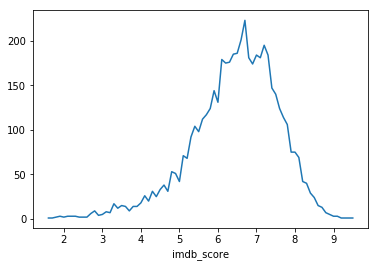

In [16]:
#5 Imdb distribution
data_groupby_ratings = data.groupby(['imdb_score'])['movie_title'].count()
data_groupby_ratings.plot()

In [17]:
print('IMDB median =', data['imdb_score'].median())
print('IMDB mean =', round(data['imdb_score'].mean(), 2))
print('IMDB mode =', data['imdb_score'].mode())
print('IMDB min =', data['imdb_score'].min())
print('IMDB max =', data['imdb_score'].max())

IMDB median = 6.6
IMDB mean = 6.44
IMDB mode = 0    6.7
dtype: float64
IMDB min = 1.6
IMDB max = 9.5


In [18]:
#6 How many movies has good Imdb score? Let's say greater than 7
print("Imdb score >7:", data.loc[data['imdb_score']>7].shape[0])
print("Imdb score >7.5:", data.loc[data['imdb_score']>7.5].shape[0])

Imdb score >7: 1594
Imdb score >7.5: 747


## 2. Adding metrics

#### “Hollywood is run by accountants at this point.” - Harmony Korine, director of Spring Breakers

##### What is ROI?
Return on investment (ROI) is a financial ratio used to calculate the benefit an investor will receive in relation to their investment cost. It is most commonly measured as net income divided by the original capital cost of the investment. The higher the ratio, the greater the benefit earned. 

In [19]:
#Add ROI column to dataframe, calculate ROI of each movie
data['ROI (%)']=round((data['gross']-data['budget'])/data['budget']*100)

data2=data.sort_values(by='ROI (%)', ascending=False)
data2=data2.round(2)
data2.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI (%)
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,719349.0
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,271466.0
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,234117.0
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265,40886.0
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,36843.0


## 3. Processing data

### 3.1 Cleaning data

In [20]:
# Drop column that we don't think there are correlation with ROI
drop_columns=['color','facenumber_in_poster','plot_keywords','movie_imdb_link','aspect_ratio','movie_facebook_likes','actor_2_facebook_likes','cast_total_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes','director_facebook_likes']
data2.drop(drop_columns,inplace=True, axis=1)
data2.head(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,ROI (%)
4793,Oren Peli,409.0,84.0,Ashley Palmer,107917283.0,Horror,Micah Sloat,Paranormal Activity,184824,Amber Armstrong,1189.0,English,USA,R,15000.0,2007.0,6.3,719349.0
4799,Jonathan Caouette,72.0,88.0,Jonathan Caouette,592014.0,Biography|Documentary,Greg Ayres,Tarnation,5709,Renee Leblanc,114.0,English,USA,Unrated,218.0,2003.0,7.2,271466.0
4707,Daniel Myrick,360.0,81.0,Joshua Leonard,140530114.0,Horror,Heather Donahue,The Blair Witch Project,186786,Michael C. Williams,3400.0,English,USA,R,60000.0,1999.0,6.4,234117.0
4984,Edward Burns,36.0,98.0,Michael McGlone,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,6375,Maxine Bahns,36.0,English,USA,R,25000.0,1995.0,6.6,40886.0
4936,Tobe Hooper,277.0,88.0,Edwin Neal,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96411,Marilyn Burns,826.0,English,USA,R,83532.0,1974.0,7.5,36843.0
3278,Tobe Hooper,277.0,88.0,Edwin Neal,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,Marilyn Burns,826.0,English,USA,R,83532.0,1974.0,7.5,36843.0
5035,Robert Rodriguez,56.0,81.0,Peter Marquardt,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,Consuelo Gómez,130.0,Spanish,USA,R,7000.0,1992.0,6.9,29056.0
4956,Travis Cluff,159.0,81.0,Cassidy Gifford,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,13521,Reese Mishler,150.0,English,USA,R,100000.0,2015.0,4.2,22658.0
4977,Morgan Spurlock,193.0,100.0,Amanda Kearsan,11529368.0,Comedy|Documentary|Drama,Chemeeka Walker,Super Size Me,85028,Amelia Giancarlo,404.0,English,USA,PG,65000.0,2004.0,7.3,17637.0
4821,John Carpenter,318.0,101.0,Donald Pleasence,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,P.J. Soles,1191.0,English,USA,R,300000.0,1978.0,7.9,15567.0


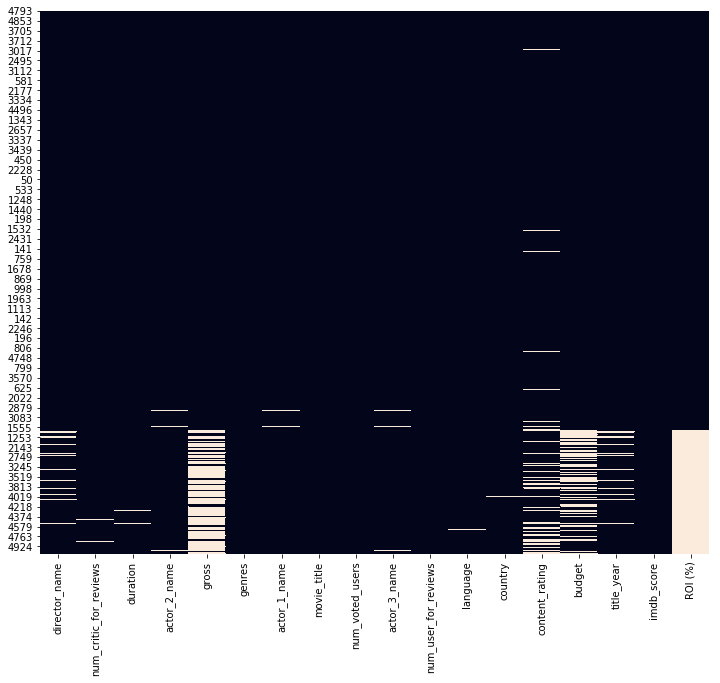

In [21]:
# Visualize missing data
plt.figure(figsize=(12,10))
sns.heatmap(data2.isnull(), cbar=False)

In [22]:
# Quan sát bằng variable ROI thì xem xem cột này có các values nào, có NA hay ko:
data2['ROI (%)'].unique()

array([ 7.19349e+05,  2.71466e+05,  2.34117e+05,  4.08860e+04,
        3.68430e+04,  2.90560e+04,  2.26580e+04,  1.76370e+04,
        1.55670e+04,  1.47010e+04,  1.21120e+04,  1.13260e+04,
        1.10350e+04,  1.00750e+04,  9.14600e+03,  7.81100e+03,
        7.64700e+03,  6.63800e+03,  6.59000e+03,  6.00000e+03,
        5.96800e+03,  5.26200e+03,  5.23700e+03,  5.22500e+03,
        5.14300e+03,  5.12900e+03,  4.89500e+03,  4.72900e+03,
        4.70300e+03,  4.62000e+03,  4.49600e+03,  4.09100e+03,
        4.09000e+03,  4.04200e+03,  3.97900e+03,  3.86600e+03,
        3.49900e+03,  3.30000e+03,  3.25100e+03,  3.15000e+03,
        3.14200e+03,  3.05400e+03,  2.98200e+03,  2.93600e+03,
        2.92300e+03,  2.92200e+03,  2.90000e+03,  2.80200e+03,
        2.72500e+03,  2.65000e+03,  2.62000e+03,  2.53800e+03,
        2.45700e+03,  2.44500e+03,  2.35100e+03,  2.28300e+03,
        2.28100e+03,  2.27200e+03,  2.19900e+03,  2.17700e+03,
        2.15300e+03,  2.14700e+03,  2.11700e+03,  2.076

ofcourse as predicted NaN values are there!! 

In [23]:
# Clean NaN value:  NaN thành empty row để dropna sau. 
empty=data2.replace('nan','')
data3= empty.dropna(subset=['ROI (%)'])
data3.head()
data3.shape

(3891, 18)

3891 row left, not bad! 

In [24]:
#Check if there is duplicated row
duplicate = data3[data3.duplicated()]
duplicate.head(10)
duplicate.shape

(35, 18)

In [25]:
#Delete dupplicated row
data3.drop_duplicates(subset=None, keep='first', inplace=True)
data3.shape 

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3856, 18)

3891 - 35 dupplicated rows = 3856 rows left to analyze. Phew! 

In [26]:
data3.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
country                    0
content_rating            51
budget                     0
title_year                 0
imdb_score                 0
ROI (%)                    0
dtype: int64

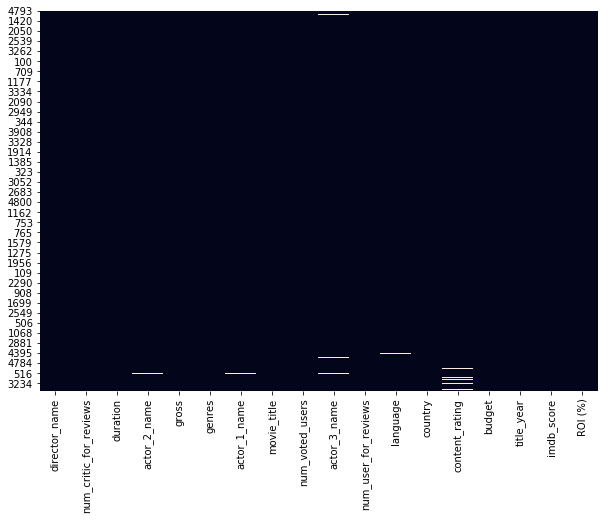

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(data3.isnull(), cbar=False)

#### Look much cleaner. However, we still need to verify if there is any strange value (outlier)

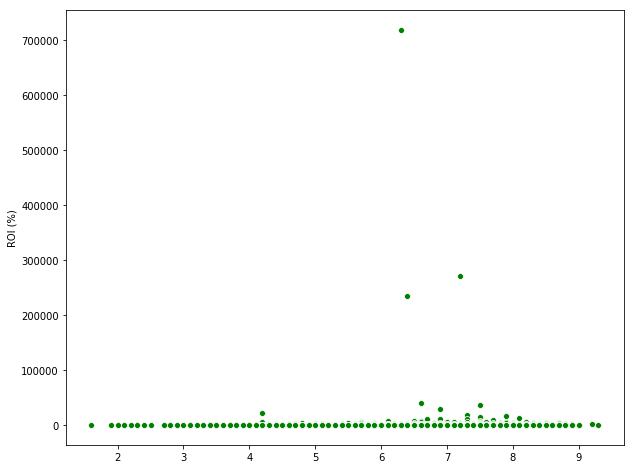

In [28]:
# Check outlier:
plt.figure(figsize=(10,8))
x= list(data3['imdb_score'])
sns.scatterplot(x,y= data3['ROI (%)'],data=data3, color='g',legend = False)

 #### =____=

- 3 points way too far with the rest of the char: open the dataframe to see if they are legit data. If not: outlier - remove. 

### 3.2 Slicing data

In [29]:
# Remove 3 first rows (outliers) & slice top_100 highest ROI dataframe to observe: 
data3.sort_values(by='ROI (%)', ascending=False) 
data3=data3[data3.budget > 1000000]
data3.head(30)
data3.shape

(3632, 18)

In [30]:
data3['index']=range(0,3632)
top_highest_roi= data3.iloc[0:101, 0:19]
top_highest_roi.head(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,ROI (%),index
4449,William Cottrell,145.0,83.0,Billy Gilbert,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,Lucille La Verne,204.0,English,USA,Approved,2000000.0,1937.0,7.7,9146.0,0
3970,Victor Fleming,157.0,226.0,George Reeves,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,Thomas Mitchell,706.0,English,USA,G,3977000.0,1939.0,8.2,4895.0,1
3737,Joel Zwick,168.0,95.0,Louis Mandylor,241437427.0,Comedy|Family|Romance,Nia Vardalos,My Big Fat Greek Wedding,102071,Lainie Kazan,756.0,English,USA,PG,5000000.0,2002.0,6.6,4729.0,2
4046,John Landis,94.0,109.0,Karen Allen,141600000.0,Comedy,John Belushi,Animal House,90177,Tim Matheson,257.0,English,USA,R,3000000.0,1978.0,7.6,4620.0,3
4485,James Wan,287.0,103.0,Monica Potter,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,Shawnee Smith,1509.0,English,USA,R,1200000.0,2004.0,7.7,4496.0,4
4168,Mel Brooks,121.0,93.0,David Huddleston,119500000.0,Comedy|Western,Madeline Kahn,Blazing Saddles,95294,Harvey Korman,363.0,English,USA,R,2600000.0,1974.0,7.8,4496.0,5
3024,George Lucas,282.0,125.0,Peter Cushing,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,Kenny Baker,1470.0,English,USA,PG,11000000.0,1977.0,8.7,4090.0,6
3080,Steven Spielberg,215.0,120.0,Dee Wallace,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,Peter Coyote,515.0,English,USA,PG,10500000.0,1982.0,7.9,4042.0,7
4413,James Wan,445.0,103.0,Barbara Hershey,53991137.0,Fantasy|Horror|Mystery|Thriller,Lin Shaye,Insidious,202800,Philip Friedman,752.0,English,USA,PG-13,1500000.0,2010.0,6.8,3499.0,8
4225,James Algar,99.0,120.0,Deems Taylor,76400000.0,Animation|Family|Fantasy|Music,Leopold Stokowski,Fantasia,71321,NaN,230.0,English,USA,G,2280000.0,1940.0,7.8,3251.0,9


In [31]:
# Slice the dataframe top_100 lowest ROI: 
data4=data3.sort_values(by='ROI (%)', ascending=False) 
data4.tail(50)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,ROI (%),index
4333,Paul Bunnell,94.0,106.0,Kevin McCarthy,2436.0,Comedy|Fantasy|Musical|Sci-Fi,Kate Maberly,The Ghastly Love of Johnny X,344,Paul Williams,19.0,English,USA,Not Rated,2.000000e+06,2012.0,5.7,-100.0,3615
3799,Klaus Menzel,13.0,103.0,Jacqueline Bisset,16066.0,Mystery|Romance|Thriller,Adam Garcia,Fascination,1207,Alice Evans,44.0,English,Germany,R,5.000000e+06,2004.0,3.3,-100.0,3614
4328,Orson Welles,90.0,92.0,Everett Sloane,7927.0,Crime|Drama|Film-Noir|Mystery|Thriller,Rita Hayworth,The Lady from Shanghai,19236,Ted de Corsia,175.0,English,USA,Not Rated,2.300000e+06,1947.0,7.7,-100.0,3613
4318,Ralph Ziman,30.0,119.0,Kenneth Nkosi,4958.0,Action|Crime|Drama,Rapulana Seiphemo,Gangster's Paradise: Jerusalema,9689,Robert Hobbs,23.0,English,South Africa,R,2.000000e+06,2008.0,7.8,-100.0,3612
91,Robert Zemeckis,188.0,100.0,Eddie Deezen,665426.0,Adventure|Animation|Family|Fantasy,Tom Hanks,The Polar Express,120798,Peter Scolari,444.0,English,USA,G,1.650000e+08,2004.0,6.6,-100.0,3589
4130,Francesca Gregorini,21.0,96.0,Amy Sedaris,5005.0,Drama,Tom Everett Scott,Tanner Hall,2280,Chris Kattan,14.0,English,USA,R,3.000000e+06,2009.0,5.9,-100.0,3573
2813,Costa-Gavras,69.0,132.0,Mathieu Kassovitz,274299.0,Biography|Crime|Drama|War,Sebastian Koch,Amen.,11077,Ulrich Mühe,55.0,English,France,Unrated,1.030000e+08,2002.0,7.3,-100.0,3587
1989,John Hillcoat,355.0,111.0,Charlize Theron,56692.0,Adventure|Drama,Viggo Mortensen,The Road,177401,Robert Duvall,504.0,English,USA,R,2.500000e+07,2009.0,7.3,-100.0,3586
1324,Sergey Bodrov,30.0,112.0,Kuno Becker,77231.0,Drama|History|War,Jay Hernandez,Nomad: The Warrior,3322,Jason Scott Lee,32.0,Kazakh,France,R,2.500000e+07,2005.0,6.0,-100.0,3562
1323,Peter Ho-Sun Chan,106.0,113.0,Takeshi Kaneshiro,128978.0,Action|Drama|History|Romance|War,Jet Li,The Warlords,22897,Andy Lau,61.0,Mandarin,Hong Kong,R,4.000000e+07,2007.0,7.1,-100.0,3561


### The Notebook with Ryan Gosling has 64k gross revenue??? Impossible! This is obviously an typing error. We have more outlier here we believe! 

- https://www.boxofficemojo.com/movies/?id=notebook.htm

In [32]:
data4=data4[data4.gross>1000000]
data4.tail(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,ROI (%),index
2879,Patrice Leconte,61.0,112.0,Daniel Auteuil,3058380.0,Drama|Romance,Emir Kusturica,The Widow of Saint-Pierre,4767,Yves Jacques,69.0,French,France,R,1.000000e+08,2000.0,7.3,-97.0,3441
1401,Roland Joffé,77.0,102.0,Dougray Scott,1068392.0,Biography|Drama|War,Jordi Mollà,There Be Dragons,3865,Lily Cole,53.0,English,Spain,PG-13,3.600000e+07,2011.0,5.9,-97.0,3430
1046,Daniel Espinosa,172.0,137.0,Fares Fares,1206135.0,Crime|Drama|Thriller,Tom Hardy,Child 44,40568,Michael Nardone,185.0,English,Czech Republic,R,5.000000e+07,2015.0,6.4,-98.0,3462
516,Mark Osborne,119.0,108.0,James Franco,1339152.0,Adventure|Animation|Drama|Family|Fantasy,Jeff Bridges,The Little Prince,28276,Mackenzie Foy,64.0,English,France,PG,8.120000e+07,2015.0,7.8,-98.0,3461
4542,Takao Okawara,107.0,99.0,Naomi Nishida,10037390.0,Action|Adventure|Drama|Sci-Fi|Thriller,Hiroshi Abe,Godzilla 2000,5442,Sakae Kimura,140.0,Japanese,Japan,PG,1.000000e+09,1999.0,6.0,-99.0,3498
3075,Karan Johar,20.0,193.0,John Abraham,3275443.0,Drama,Shah Rukh Khan,Kabhi Alvida Naa Kehna,13998,Preity Zinta,264.0,Hindi,India,R,7.000000e+08,2006.0,6.0,-100.0,3611
2988,Joon-ho Bong,363.0,110.0,Kang-ho Song,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,Ah-sung Ko,279.0,Korean,South Korea,R,1.221550e+10,2006.0,7.0,-100.0,3625
3851,Carlos Saura,35.0,115.0,Juan Luis Galiardo,1687311.0,Drama|Musical,Mía Maestro,Tango,2412,Miguel Ángel Solá,40.0,Spanish,Spain,PG-13,7.000000e+08,1998.0,7.2,-100.0,3588
3273,Anurag Basu,41.0,90.0,Steven Michael Quezada,1602466.0,Action|Drama|Romance|Thriller,Bárbara Mori,Kites,9673,Kabir Bedi,106.0,English,India,NaN,6.000000e+08,2010.0,6.0,-100.0,3559
2323,Hayao Miyazaki,174.0,134.0,Jada Pinkett Smith,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,Billy Crudup,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,8.4,-100.0,3557


### "Princess Mononoke with 23M USD of investment got only 2M USD in revenue": How can it be possible???  

- https://www.boxofficemojo.com/movies/?id=princessmononoke.htm
- https://www.boxofficemojo.com/movies/?id=thelittleprince.htm

#### How about the top ROI? 
- https://www.boxofficemojo.com/movies/?id=snowwhite.htm 

Decision? give up the top_lowest_ROI list 

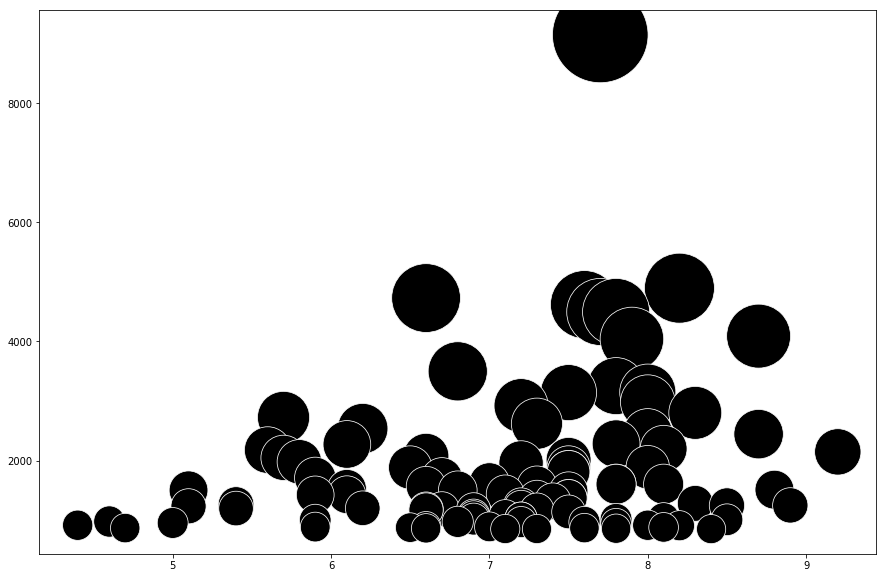

In [33]:
# Let's plot some chart to see the accuracy of the new dataframes (highest_roi)

plt.figure(figsize=(15,10))
x1=list(top_highest_roi['imdb_score'])
y1=list(top_highest_roi['ROI (%)'])

sns.scatterplot(x1,y1,data=top_highest_roi, s=y1, color='black')

#### Observation:
- High ROIs distribute mostly in the range 6.5-8.5 Imdb score. 

## 4. Visualization & observation

In [34]:
# Frequency of genre in top_highest_ROI dataframe: 
def repp(string):
   return string.replace("|",",")[:-1]

genres_series = top_highest_roi['genres'].apply(repp)

genres = []
for genre in genres_series:
   genres.append([e.strip() for e in genre.split(",")])

genres_dict = {}
for genree in genres:
   for a in genree:
       if a in genres_dict:
           genres_dict[a] +=1
       else:
           genres_dict[a] = 1

genres_dict

{'Animation': 3,
 'Family': 9,
 'Fantasy': 14,
 'Musica': 3,
 'Drama': 32,
 'History': 1,
 'Romance': 6,
 'Wa': 6,
 'Comedy': 27,
 'Romanc': 15,
 'Comed': 6,
 'Horror': 14,
 'Mystery': 6,
 'Thrille': 19,
 'Wester': 2,
 'Action': 13,
 'Adventure': 10,
 'Sci-F': 5,
 'Musi': 3,
 'Musical': 2,
 'Crime': 8,
 'Dram': 11,
 'Horro': 11,
 'Music': 2,
 'Myster': 4,
 'Sci-Fi': 1,
 'Biography': 5,
 'Documentary': 1,
 'Crim': 1,
 'Fantas': 1,
 'Famil': 4,
 'Adventur': 1,
 'Documentar': 5,
 'Spor': 4}

In [35]:
# Since there are some genres has typo error, we sum it up to have a more accuracy dictionary: 
genres_dict2={'Animation': 3,
 'Family': 13,
 'Fantasy': 15,
 'Musical': 10,
 'Drama': 43,
 'History': 1,
 'Romance': 21,
 'War': 6,
 'Comedy': 33,
 'Horror': 25,
 'Mystery': 10,              
 'Thriller': 19,
 'Western': 2,
 'Action': 13,
 'Adventure': 11,
 'Sci-Fi': 6,
 'Crime': 9,
 'Biography': 5,
 'Documentary': 6,
 'Sport': 4}

#### Observation: 
- The Total of values in genres_dict2 = 249 (we don't count "Documentary") while there are only 100 movies in the top_highest_roi dataframe, mean that each movie has in average 249/100= 2.49 genres. A mix of genre for a success movie is a must? 

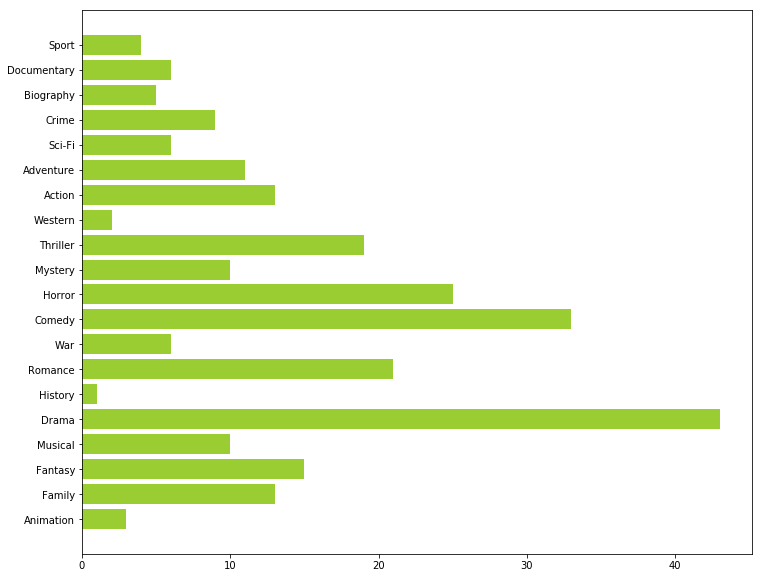

In [36]:

names = list(genres_dict2.keys())
values = list(genres_dict2.values())

fig = plt.figure(figsize=(12,10))
plt.barh(range(len(genres_dict2)),values,tick_label=names, color='yellowgreen')
plt.show()

### Observation:
- Top 5 common genres: Drama > Comedy > Horror > Thriller > Romance.
- Top 5 rarest genres: History < Western < Animation < Sport < Biography. 

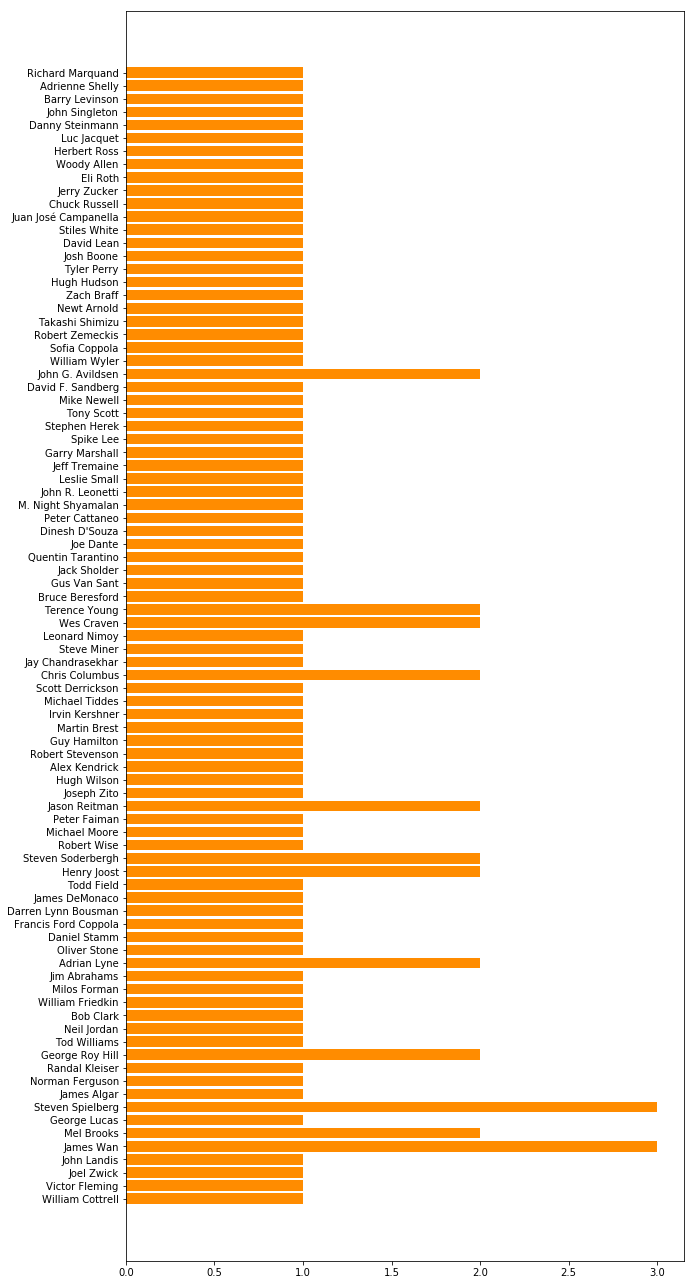

In [37]:
# Let's look at the director list:
director_list = top_highest_roi['director_name'].tolist()
director_list

director_dict = {}
for director in director_list:
   if director in director_dict:
       director_dict[director] +=1
   else:
       director_dict[director] = 1

director_dict

director_names = list(director_dict.keys())
director_freq = list(director_dict.values())

fig = plt.figure(figsize=(10,23))
plt.barh(range(len(director_dict)),director_freq,tick_label=director_names, color='darkorange')
plt.savefig('director.png')
plt.show()

#### In 100 movies:
- 10 directors has 2 films (10%)
- Only 2 directors has 3 films (2%)


### Big names show up: 
- #### Steven Spielberg: 
He is considered one of the founding pioneers of the New Hollywood era and one of the most popular directors and producers in film history. His net worth is 3.7 billion USD (2019) & here are some of his movies: Jaws (1975), E.T. the Extra-Terrestrial (1982), Indiana Jones and the Temple of Doom (1984), Jurassic Park (1993), Schindler's List (1993),Saving Private Ryan (1998), Catch Me If You Can (2002), Memoirs of a Geisha (2005), Letters from Iwo Jima (2006), Lincoln (2012).. 
- #### James Wan (1977) 
An Australian film producer, screenwriter and film director of Malaysian Chinese descent. He is widely known for directing the horror film Saw (2004) and creating Billy the puppet. Wan has also directed Dead Silence (2007), Death Sentence (2007), Insidious (2010), The Conjuring (2013) and Furious 7 (2015)..


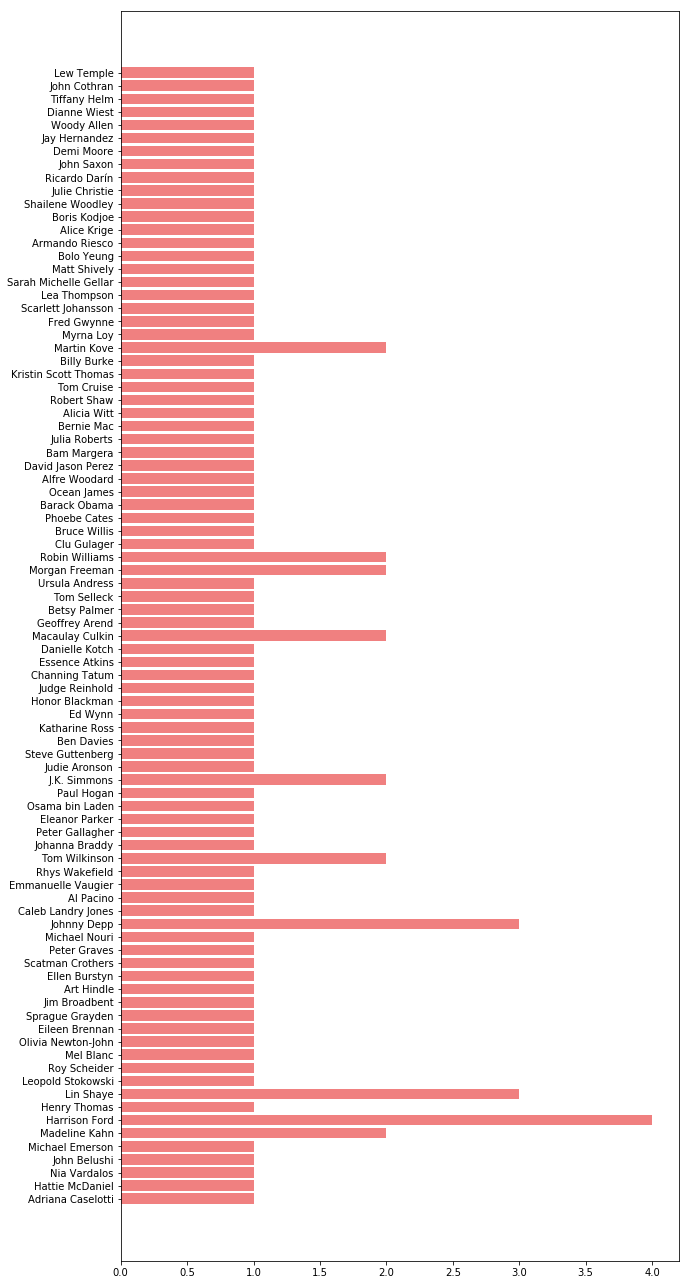

In [38]:
# Maybe some leading actor/actress has a good sense for great script? 

actor_1_list = top_highest_roi['actor_1_name'].tolist()
actor_1_list

actor_1_dict = {}
for actor in actor_1_list:
   if actor in actor_1_dict:
       actor_1_dict[actor] +=1
   else:
       actor_1_dict[actor] = 1

actor_1_dict

actor_1_names = list(actor_1_dict.keys())
actor_1_freq = list(actor_1_dict.values())

fig = plt.figure(figsize=(10,23))
plt.barh(range(len(actor_1_dict)),actor_1_freq,tick_label=actor_1_names, color='lightcoral')
plt.show()

- Harrison Ford (Han Solo - Star Wars) has a great eye! The only one who played leading actor in 4 top_ROI movies. 
- Lin Shaye, Johnny Depp follow in the list (3 times/each) 
- 7 other actors/actress played 2 movies each. 

Genre list: ['Approved' 'G' 'PG' 'R' 'PG-13' 'M' 'X' 'Not Rated']


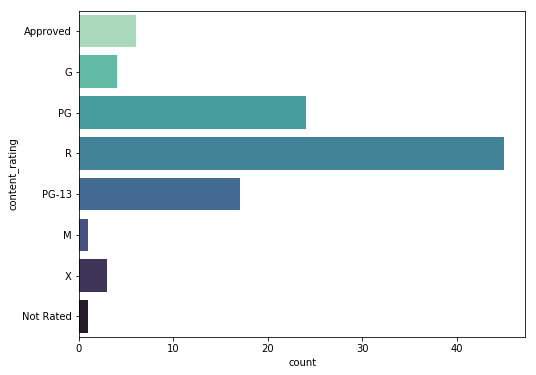

In [39]:
# How about Content rating? Is there any specific range of audience affect to the revenue of a movie? 
content_rating = top_highest_roi['content_rating'].str.get_dummies()
#print(content_rating)
#sum(content_rating['PG-13'])
genre_title = top_highest_roi['content_rating'].unique()
print('Genre list:',genre_title)

plt.figure(figsize=(8,6))
sns.countplot(y=top_highest_roi['content_rating'], data=top_highest_roi, palette="mako_r")
plt.show()

In [40]:
#grouping Content rating 
top_highest_roi['Content group']=np.nan
top_highest_roi=top_highest_roi.dropna(subset=['content_rating'])
top_highest_roi.loc[(top_highest_roi['content_rating']=='G') | (top_highest_roi['content_rating']=='Approved')| (top_highest_roi['content_rating']=='Passed') |(top_highest_roi['content_rating']=='TV-Y') | (top_highest_roi['content_rating']=='TV-Y7'), 'Content group']= 'All age allowed'
top_highest_roi.loc[(top_highest_roi['content_rating']=='PG')| (top_highest_roi['content_rating']=='GP') | (top_highest_roi['content_rating']=='TV-X7') |(top_highest_roi['content_rating']=='TV-14') | (top_highest_roi['content_rating']=='PG-13') | (top_highest_roi['content_rating']=='TV-PG'), 'Content group']= 'Parents Guidance Suggested'
top_highest_roi.loc[(top_highest_roi['content_rating']=='M') | (top_highest_roi['content_rating']=='R') | (top_highest_roi['content_rating']=='X') | (top_highest_roi['content_rating']=='NC-17'), 'Content group']='Restricted under 17'
top_highest_roi.loc[(top_highest_roi['content_rating']=='Not Rated') | (top_highest_roi['content_rating']=='Unrated'), 'Content group']= 'Not rated'

top_highest_roi.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,ROI (%),index,Content group
4449,William Cottrell,145.0,83.0,Billy Gilbert,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,Lucille La Verne,204.0,English,USA,Approved,2000000.0,1937.0,7.7,9146.0,0,All age allowed
3970,Victor Fleming,157.0,226.0,George Reeves,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,Thomas Mitchell,706.0,English,USA,G,3977000.0,1939.0,8.2,4895.0,1,All age allowed
3737,Joel Zwick,168.0,95.0,Louis Mandylor,241437427.0,Comedy|Family|Romance,Nia Vardalos,My Big Fat Greek Wedding,102071,Lainie Kazan,756.0,English,USA,PG,5000000.0,2002.0,6.6,4729.0,2,Parents Guidance Suggested
4046,John Landis,94.0,109.0,Karen Allen,141600000.0,Comedy,John Belushi,Animal House,90177,Tim Matheson,257.0,English,USA,R,3000000.0,1978.0,7.6,4620.0,3,Restricted under 17
4485,James Wan,287.0,103.0,Monica Potter,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,Shawnee Smith,1509.0,English,USA,R,1200000.0,2004.0,7.7,4496.0,4,Restricted under 17


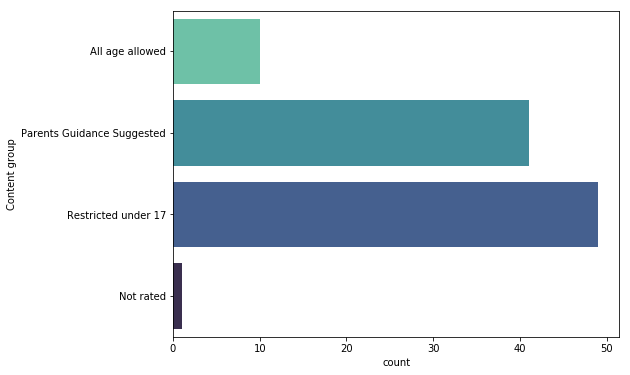

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(y="Content group", data=top_highest_roi, palette="mako_r")
plt.show()

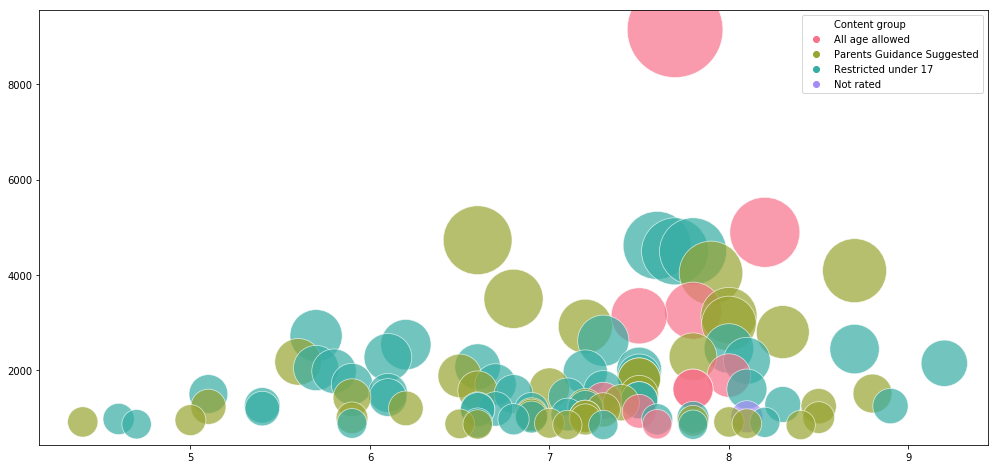

In [42]:
plt.figure(figsize=(17,8))
sns.scatterplot(x1,y1,data=top_highest_roi, s=y1,hue="Content group", alpha=0.7, palette='husl')

### Observation: 
- All age allowed (light red): Imdb score from 7.5 - 8.3
- Restricted under 17 (blue) : has the widest range of Imdb score, and also the highest Imdb score. Mostly in 6.5-7.5 points.
- Parent guidance suggested (green): also has a wide range of Imdb score as Restricted under 17. Mostly in 6.5-8 points & in that range it has higher ROI than Restricted under 17. 
- Not rated (purple): only at 8.3 points

- High ROI movies mostly in PG rating (green) 

## 5. A step further


Compare to top_lowest_ROI? 

# 6. Conclusion

#### Investing in a film project is risky, that's true. As your data analytics team, we recommend you to look up a script that has: 
    - Multiple genres (>2)
    Highly recommend: Drama > Comedy > Horror > Thriller > Romance.
    Avoid: History < Western < Animation < Sport < Biography.
    - Advise from  experienced director & actor/actress. 
    - Restricted for a certain age (contain some inappropriate material for children) 

### But, perhaps success has nothing to do with numbers and ratings. 

Let's us remind you about "The Shawshank Redemption": released in 1994, it flopped dramatically at the box office: It only yielded 28 million Usd in theatres, just barely breaking even against its 25 million budget. Today, it’s #1 on IMDB’s “Top Rated Movies” chart and has made The American Film Institute’s list of the 100 Greatest American Films of All Time. Be honest with us, would you proud if you were its investor?
